**Multiple Linear Regression**
* Gradient Descent and Normal Equation Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.loadtxt('ex3Data/ex3x.dat', dtype=np.float32)
y = np.loadtxt('ex3Data/ex3y.dat', dtype=np.float32)

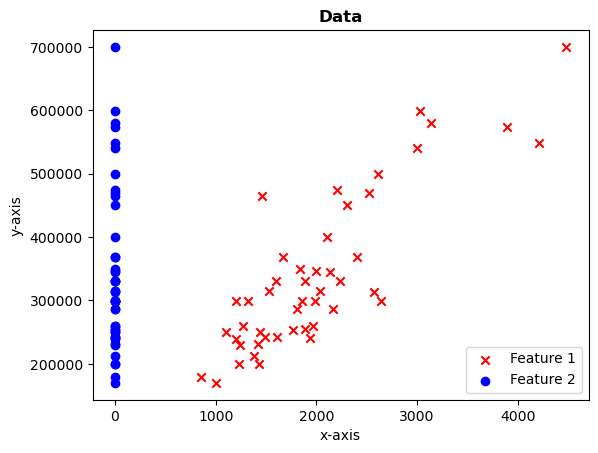

In [6]:
plt.scatter(x[:, 0], y, marker='x', c='r', label='Feature 1')
plt.scatter(x[:, 1], y, marker='o', c='b', label='Feature 2')
plt.title("Data", fontweight="bold")
plt.xlabel("x-axis")
plt.ylabel("y-axis")  
plt.legend()
plt.show()

__First column: bias (intercept), next columns: input features__

In [ ]:
X = np.ones((x.shape[0], 3))
X[:, 1] = x[:, 0]
X[:, 2] = x[:, 1]
X

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00],
       [1.000e+00, 1.985e+03, 4.000e+00],
       [1.000e+00, 1.534e+03, 3.000e+00],
       [1.000e+00, 1.427e+03, 3.000e+00],
       [1.000e+00, 1.380e+03, 3.000e+00],
       [1.000e+00, 1.494e+03, 3.000e+00],
       [1.000e+00, 1.940e+03, 4.000e+00],
       [1.000e+00, 2.000e+03, 3.000e+00],
       [1.000e+00, 1.890e+03, 3.000e+00],
       [1.000e+00, 4.478e+03, 5.000e+00],
       [1.000e+00, 1.268e+03, 3.000e+00],
       [1.000e+00, 2.300e+03, 4.000e+00],
       [1.000e+00, 1.320e+03, 2.000e+00],
       [1.000e+00, 1.236e+03, 3.000e+00],
       [1.000e+00, 2.609e+03, 4.000e+00],
       [1.000e+00, 3.031e+03, 4.000e+00],
       [1.000e+00, 1.767e+03, 3.000e+00],
       [1.000e+00, 1.888e+03, 2.000e+00],
       [1.000e+00, 1.604e+03, 3.000e+00],
       [1.000e+00, 1.962e+03, 4.00

**Feature Scaling**
- __z-score Normalization__

In [17]:
X[:, 1] = (X[:, 1] - np.mean(X[:, 1]))/np.std(X[:, 1])
X[:, 2] = (X[:, 2] - np.mean(X[:, 2]))/np.std(X[:, 2])

y = (y - np.mean(y)) / np.std(y)

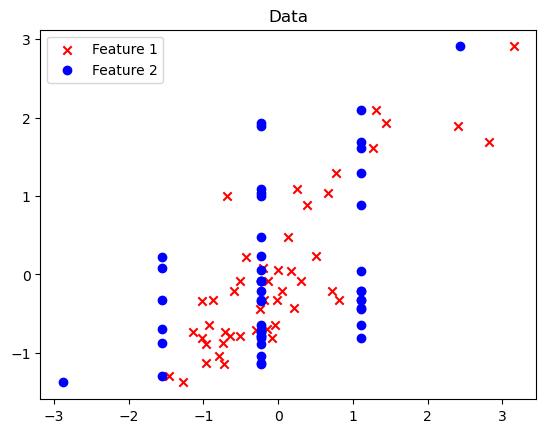

In [19]:
plt.scatter(X[:, 1], y, marker='x', c='r', label='Feature 1')
plt.scatter(X[:, 2], y, marker='o', c='b', label='Feature 2')
plt.title("Data")
plt.legend()
plt.show()

In [20]:
def hypothesis(x, w):
    return np.dot(x, w)

In [21]:
def cost(x, y, w):
    return 1/(2*x.shape[0]) * sum(hypothesis(x, w) - y)**2

In [22]:
def gradient(x, y, w):
    return 1/x.shape[0] * x.T.dot(hypothesis(x, w) - y)

In [35]:
w = np.array([0, 0, 0])
costVal = []
epochs = []

for i in range(1, 10000):
    costVal.append(cost(X, y, w))
    w = w - 0.0003 * gradient(X, y, w)
    epochs.append(i)

In [36]:
w

array([2.73396681e-08, 7.55637472e-01, 6.82374454e-02])

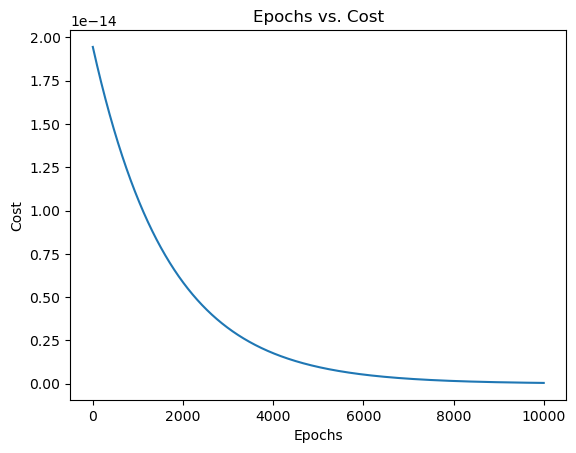

In [37]:
plt.plot(epochs, costVal)
plt.title("Epochs vs. Cost")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

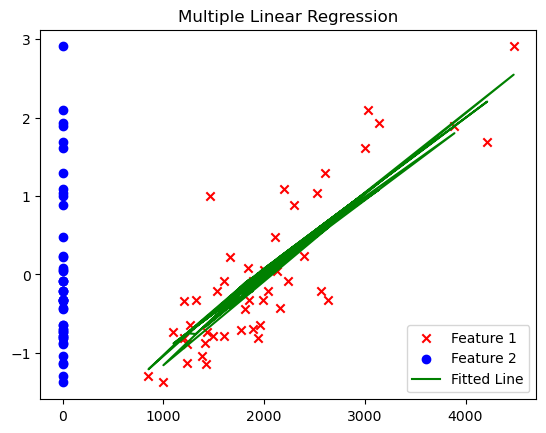

In [44]:
plt.scatter(x[:, 0], y, marker='x', c='r', label="Feature 1")
plt.scatter(x[:, 1], y, marker='o', c='b', label="Feature 2")
plt.plot(x[:, 0], hypothesis(X, w), c='g', label="Fitted Line")
plt.title("Multiple Linear Regression")
plt.legend()
plt.show()

---

**Normal Equation**

In [53]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y

In [54]:
theta

array([ 2.87719229e-08,  8.84765964e-01, -5.31788185e-02])

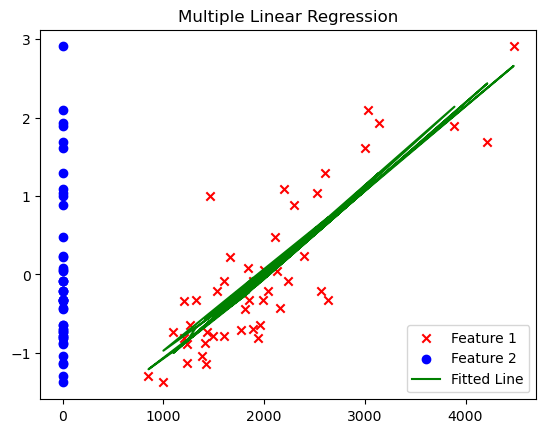

In [55]:
plt.scatter(x[:, 0], y, marker='x', c='r', label="Feature 1")
plt.scatter(x[:, 1], y, marker='o', c='b', label="Feature 2")
plt.plot(x[:, 0], hypothesis(X, theta), c='g', label="Fitted Line")
plt.title("Multiple Linear Regression")
plt.legend()
plt.show()

In [49]:
# 2nd Implementation
theta = np.linalg.pinv(np.dot(X.T, X)).dot(np.dot(X.T, y))

In [50]:
theta

array([ 2.87719231e-08,  8.84765964e-01, -5.31788185e-02])

In [51]:
# 3rd Implementation
theta = np.linalg.pinv(X.T.dot(X)).dot(X.T.dot(y))

In [52]:
theta

array([ 2.87719231e-08,  8.84765964e-01, -5.31788185e-02])

---
Thank You